# **Trabajo de investigacion de Modelo predictivo SHAP**

# _SHAP(SHapley Additive exPlanations)_

El objetivo:

- aplicar modelo de clasificacion RandomForestRegressor para el best model de algoritmos
- Generar entrenamiento
- Visualizacion de datos


In [24]:
import numpy as np  # linear algebra

np.bool = np.bool_
np.float = float
import matplotlib.pyplot as plt

# import matplotlib
# matplotlib.use('TkAgg') #util para visualizar las imagenes y guardarlas en una ruta fija.
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# from lime import lime_tabular
import warnings
from numba import NumbaDeprecationWarning
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os

for dirname, _, filenames in os.walk("../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../"))

from custom import functions

shap.initjs()
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")
warnings.filterwarnings('ignore', category=NumbaDeprecationWarning)

../../resources/allColProSol.xlsx
../../resources/dataset_a_2021.csv
../../resources/dataset_a_2021c2.csv
../../resources/dataset_a_2021v1.xlsx
../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../resources/dataset_unab_P1.csv
../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../resources/exitoFallidoProgramaSol.xlsx
../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../resources/exitososFallidosEnviosSol.xlsx
../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../resources/sinColCeroExitosoFallidosSol.xlsx
../../resources/v2_hitosExitoFalloColESol1.csv
../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../resources/v2_hitosExitoFalloSol1Programa.csv
../../resources/causalidad\causalidad.dot
../../resources/causalidad\causalidad.png
../../resources/causalidad\causalidad_e29.dot
../../resources/causalidad\graph_causal_model_e29.png
../../resources/causal

In [2]:
# Read and preview data
df = pd.read_csv(
    "../../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True
)

In [3]:
df.describe()

,hito1,hito2,exitosos,fallidos,e0,e1,e2,e3,e4,e5,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.0,...,839.000000,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.000000
mean,13.353993,0.168057,7.476758,11.287247,0.505364,0.009535,0.0,0.352801,0.734207,0.0,...,0.010727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.642789
std,10.370917,1.929950,5.361101,8.432787,0.500269,0.097239,0.0,0.478126,0.442018,0.0,...,0.103076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.832625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,3.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.200000
50%,13.000000,0.000000,7.000000,10.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.700000
75%,20.000000,0.000000,11.000000,16.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000
max,42.000000,32.000000,28.000000,47.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000


In [4]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.

print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [5]:
# verificar los valores en todas las columnas
student_array = df.to_numpy()

# Verificar si hay valores no finitos en el dataset
is_finite = np.isfinite(student_array)

print(is_finite)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [6]:
# Obtener los valores correspondientes donde is_finite es True
finite_values = student_array[is_finite]
print(finite_values)

[17.  0. 10. ...  0.  7.  1.]


In [7]:
# Verificar si hay valores NaN en el dataset
is_nan = np.isnan(student_array)
print(is_nan)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# **Entrenamiento**

Preparando las coordenadas de análisis X/Y, donde utilizaremos la columna 'aprobado' (binario obtenida de sol1 donde 1 es equivale aprobado con un una nota mayor o igual 4) como referencia para el eje Y, y analizaremos el comportamiento de las demás columnas en relación a dicho eje X.


In [8]:
y = df['aprobado']
X = df[
    [
        'e0', 'e1', 'e2', 'e3', 'e4','e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33','e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52'
    ]
]

Se dividen los datos en un conjunto de entrenamiento (80% de los datos) y un conjunto de prueba (20% de los datos), y almacena esos conjuntos en las variables correspondientes. Esto es útil para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1502
)

# _Modelo de regresión con bosques aleatorios (Random Forest Regressor)_

- `Random Forest Regressor` utiliza un conjunto de árboles de decisión construidos en base a subconjuntos aleatorios de características y datos de entrenamiento para realizar predicciones en problemas de regresión. La predicción final se obtiene al combinar las predicciones de cada árbol.
- `max_depth=10`: Especifica la profundidad máxima de cada árbol en el bosque. En este caso, se establece en 10, lo que significa que cada árbol puede tener un máximo de 10 niveles de profundidad.
- `min_samples_split=10`: Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Este parámetro controla la regularización del modelo y evita la sobredivisión de los nodos. Aquí se establece en 10, lo que significa que un nodo solo se dividirá si tiene al menos 10 muestras.
- `min_samples_leaf=5`: Especifica el número mínimo de muestras requeridas en cada hoja del árbol. Similar a min_samples_split, este parámetro también controla la regularización del modelo y evita la creación de hojas con muy pocas muestras. En este caso, se establece en 5, lo que significa que cada hoja del árbol debe tener al menos 5 muestras.
- `random_state=1502`: Establece la semilla para la generación de números aleatorios. Esto asegura que el modelo sea reproducible y produzca los mismos resultados cada vez que se ejecute con la misma semilla. Aquí se utiliza el valor 1502 como semilla.
- `n_estimators=500`: Especifica el número de árboles en el bosque. En este caso, se utilizan 500 árboles para construir el bosque. Un mayor número de árboles puede mejorar la precisión del modelo, pero también aumenta el tiempo de entrenamiento y la complejidad computacional.


In [10]:
model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1502,
    n_estimators=500,
)
model.fit(X_train, y_train)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=500, random_state=1502)

In [11]:
# Realizar Stratified K-Fold Cross-Validation en los datos de entrenamiento
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1502)

# Matrices para almacenar los resultados de validación cruzada
cv_scores = []
cv_predictions = []

for train_index, val_index in kfold.split(X_train, y_train):
    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento del fold actual
    model.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación del fold actual
    y_val_pred = model.predict(X_val_fold)

    # Calcular el error cuadrático medio en el conjunto de validación del fold actual
    fold_score = mean_squared_error(y_val_fold, y_val_pred)
    cv_scores.append(fold_score)

    # Almacenar las predicciones del fold actual para su uso posterior
    cv_predictions.extend(y_val_pred)

    # Calcular el coeficiente de determinación en el conjunto de validación del fold actual
    r2 = r2_score(y_val_fold, y_val_pred)
    print("Fold - Error cuadrático medio:", fold_score)
    print("Fold - Coeficiente de determinación (R2):", r2)
    print()

# Calcular la puntuación promedio de validación cruzada
avg_score = np.mean(cv_scores)
percentage_score = avg_score * 100
print("Promedio del error cuadrático medio en validación cruzada:", avg_score)
print(
    "Promedio del error cuadrático medio en validación cruzada en %:", percentage_score
)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.22507559054920195
Fold - Coeficiente de determinación (R2): 0.09263336469092409



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.2071011775793665
Fold - Coeficiente de determinación (R2): 0.16695592638550505



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.22813251459867703
Fold - Coeficiente de determinación (R2): 0.07739922699688195



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.19132771625529169
Fold - Coeficiente de determinación (R2): 0.2262431366936899



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.20775721357103138
Fold - Coeficiente de determinación (R2): 0.15979988133300926



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.21950170037411648
Fold - Coeficiente de determinación (R2): 0.11230348380233446



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.23735835803295155
Fold - Coeficiente de determinación (R2): 0.04008858629737022



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.2091121383070612
Fold - Coeficiente de determinación (R2): 0.1543203703960384



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

Fold - Error cuadrático medio: 0.20281655819528843
Fold - Coeficiente de determinación (R2): 0.17978060383905448

Fold - Error cuadrático medio: 0.2024071909721953
Fold - Coeficiente de determinación (R2): 0.18143614389713103

Promedio del error cuadrático medio en validación cruzada: 0.21305901584351816
Promedio del error cuadrático medio en validación cruzada en %: 21.305901584351815


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Si el RMSE es 0, significa que el modelo predice perfectamente los valores reales. Cuanto más cerca esté el MSE o RMSE de cero, mejor será el rendimiento del modelo en términos de la diferencia entre las predicciones y los valores reales.


In [12]:
# Realizar la predicción con SHAP utilizando el conjunto de prueba (X_test)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# _Visualizando entrenamiento_

- `explainer.expected_value`: Esto representa el valor esperado de las predicciones del modelo. Es el valor base al que se le suma o se le resta la contribución de cada característica para obtener la predicción final.
- `shap_values[0,:]`: Estos son los valores SHAP para una muestra en particular del conjunto de prueba. Estos valores representan la contribución de cada característica en la predicción para esa muestra específica.
- `X_test.iloc[0,:]`: Esto corresponde a la primera muestra del conjunto de prueba (X_test). Representa los valores de las características para esa muestra.
- `link='logit'`: Este parámetro especifica la función de enlace utilizada para transformar los valores SHAP. En este caso, se utiliza la función logística (logit) para mapear los valores SHAP a una escala interpretable.
- `matplotlib=True`: Este parámetro indica que se utilizará la biblioteca Matplotlib para generar el gráfico de fuerza.


`"higher"` se refiere a las instancias que tienen valores más altos de la característica en comparación con otras instancias, y tienen un mayor impacto en la probabilidad de ser `"aprobado"`. Por otro lado, `"lower"` se refiere a las instancias con valores más bajos de la característica, que tienen un menor impacto en la probabilidad de ser `"aprobado"`.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


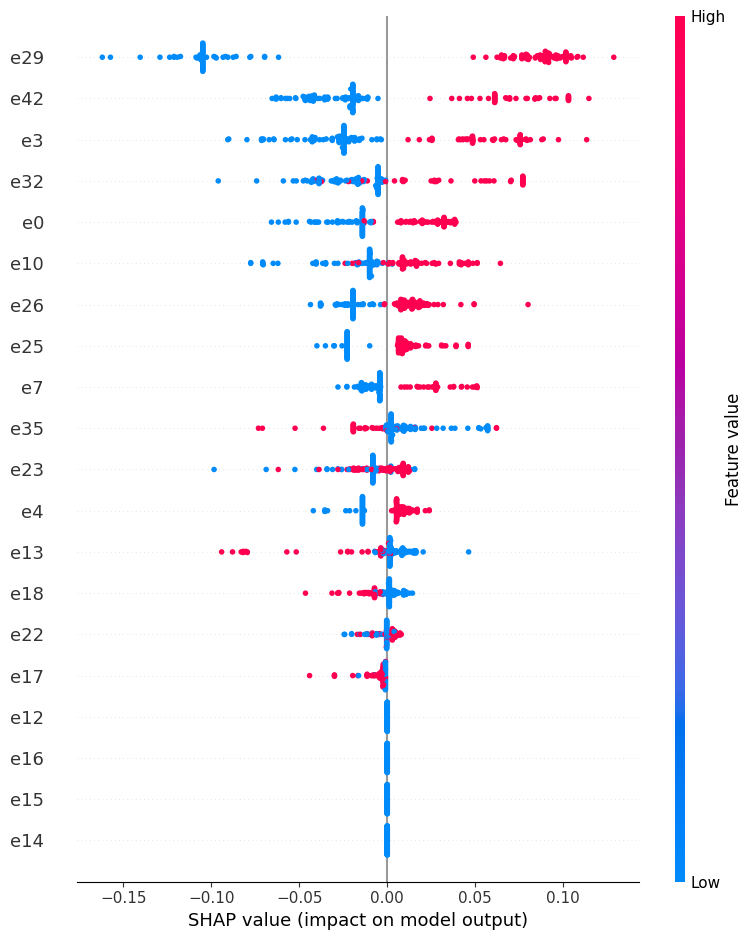

In [13]:
# Mostrar Grafico de Caracteristicas
shap.summary_plot(shap_values, X_test)

# _Calcula la importancia media absoluta de los valores SHAP para cada característica_


In [14]:
# Calcula la importancia media absoluta de los valores SHAP para cada característica
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Calcula la importancia relativa como un porcentaje
relative_importance = mean_abs_shap_values / np.sum(mean_abs_shap_values) * 100

# Ordena las características por importancia
sorted_indices = np.argsort(relative_importance)[::-1]
features_sorted = X_train.columns[sorted_indices]
importance_sorted = relative_importance[sorted_indices]

# Imprime la importancia relativa de cada característica
for feature, importance in zip(features_sorted, importance_sorted):
    print(f"{feature}: {importance:.2f}%")

e29: 26.82%
e42: 11.79%
e3: 11.69%
e32: 7.46%
e0: 6.68%
e10: 5.56%
e26: 4.99%
e25: 4.38%
e7: 3.91%
e35: 3.74%
e23: 3.20%
e4: 3.11%
e13: 2.93%
e18: 1.54%
e22: 1.11%
e17: 1.10%
e12: 0.00%
e16: 0.00%
e15: 0.00%
e14: 0.00%
e49: 0.00%
e11: 0.00%
e20: 0.00%
e9: 0.00%
e8: 0.00%
e6: 0.00%
e5: 0.00%
e50: 0.00%
e2: 0.00%
e1: 0.00%
e19: 0.00%
e45: 0.00%
e21: 0.00%
e34: 0.00%
e43: 0.00%
e46: 0.00%
e41: 0.00%
e40: 0.00%
e39: 0.00%
e38: 0.00%
e37: 0.00%
e36: 0.00%
e33: 0.00%
e44: 0.00%
e47: 0.00%
e31: 0.00%
e30: 0.00%
e48: 0.00%
e28: 0.00%
e27: 0.00%
e51: 0.00%
e24: 0.00%
e52: 0.00%


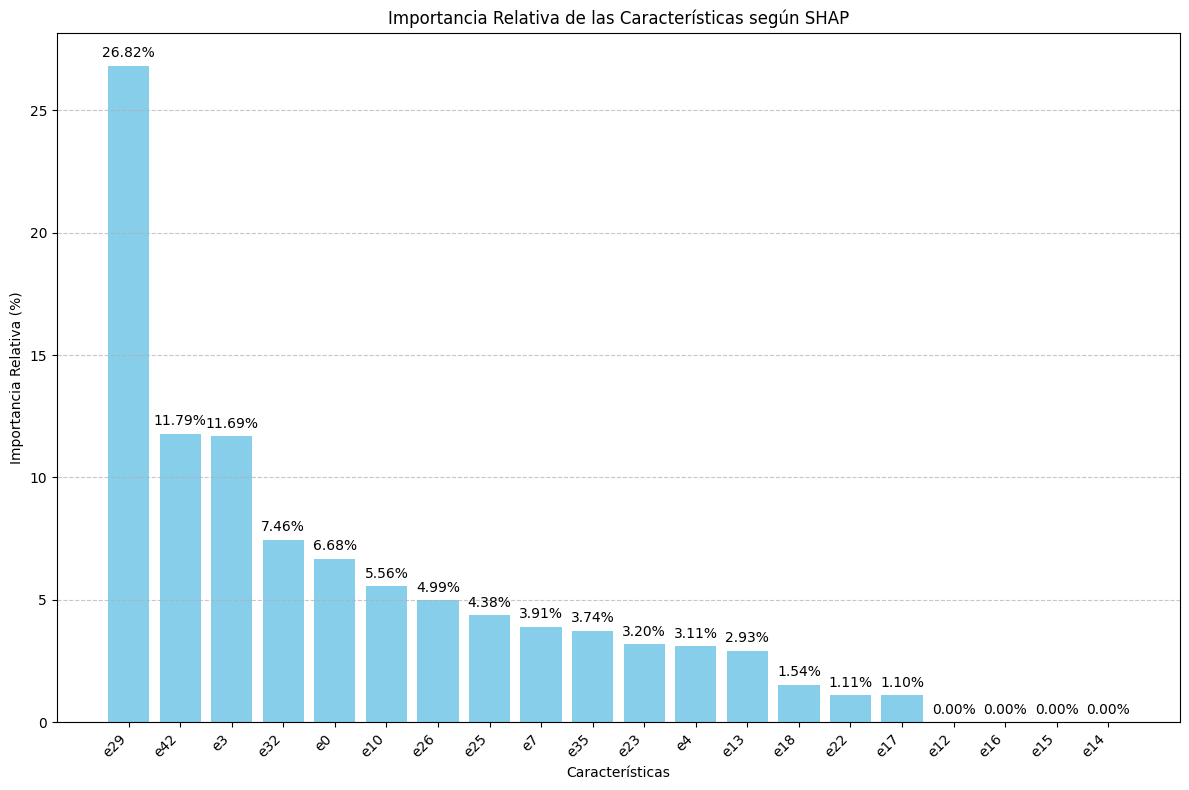

In [15]:
# Número de características a mostrar (puedes ajustarlo según tus necesidades)
num_features = 20

# Selecciona las primeras 'num_features' características más importantes
top_features = features_sorted[:num_features]
top_importance = importance_sorted[:num_features]

# Crea el gráfico de barras verticales
plt.figure(figsize=(12, 8))
bars = plt.bar(top_features, top_importance, color="skyblue")

# Agrega el porcentaje arriba de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.2f}%",
        ha="center",
        va="center",
        color="black",
        fontsize=10,
    )

plt.ylabel("Importancia Relativa (%)")
plt.xlabel("Características")
plt.title("Importancia Relativa de las Características según SHAP")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

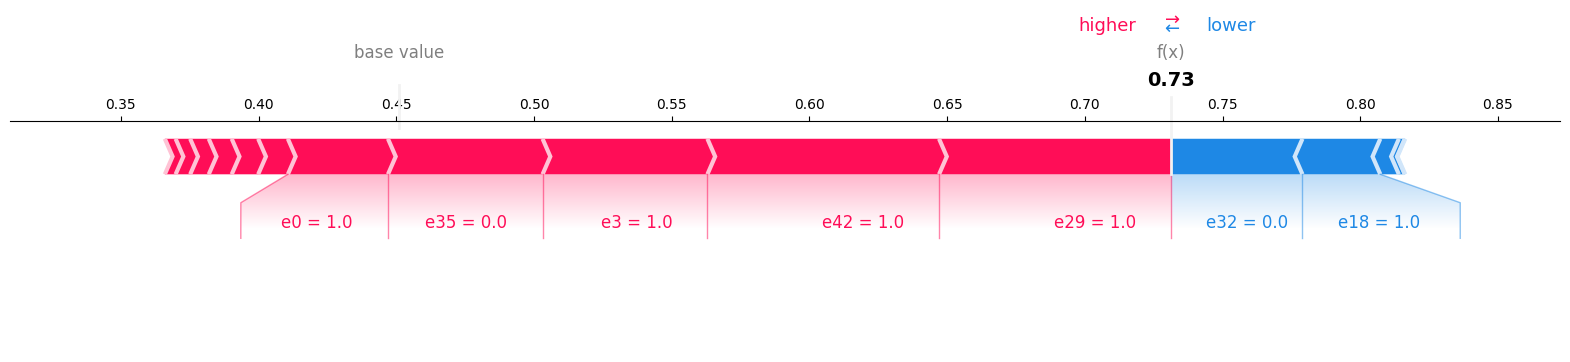

In [16]:
# Crear la figura de matplotlib
shap.force_plot(
    explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True
)

Al revisar el grafico generado por matplotlib podemos ver:

- e42: La variable tiene una respuesta de 1.0 en la pregunta de la guía y aproximadamente un 59% de importancia.
- e29: La variable tiene una respuesta de 1.0 en la pregunta de la guía y aproximadamente un 54% de importancia.
- e35: La variable tiene una respuesta de 1.0 en la pregunta de la guía y aproximadamente un 47% de importancia.
- e3: La variable tiene una respuesta de 1.0 en la pregunta de la guía y aproximadamente un 46% de importancia.
- fallidos: La variable tiene 4.0 intentos para lograr el éxito en la pregunta y aproximadamente un 49% de importancia.

El impacto más bajo lo presenta la variable "e18", con una respuesta de 1.0 en la pregunta de la guía y una importancia aproximada del 81% al 85%.

La marca "f(x)" en el gráfico representa el valor de predicción del modelo. En este caso, el valor es 0.81


In [17]:
shap.force_plot(explainer.expected_value, shap_values, X_test, matplotlib=False)

En el gráfico Force Plot se puede observar que:

- En el eje y está seleccionado como "f(x)", lo que indica la contribución acumulada de las características para determinar la predicción del modelo.
- En el eje x está seleccionado como "sample order by similarity", lo que significa que los datos se ordenan en función de su similitud.
- Las barras verticales representan las características individuales del conjunto de datos.
- La posición de cada barra en el eje horizontal indica si la contribución de la característica es positiva o negativa para la predicción.
- El color de las barras indica el valor de la característica para cada muestra en X_test. Los colores se generan utilizando un mapa de colores.
- La altura de cada barra muestra la magnitud de la contribución de la característica a la predicción del modelo.
- El valor base, representado por una línea horizontal en el centro del gráfico, indica el valor de referencia desde el cual se inician las contribuciones de las características. En este caso, se establece en explainer.expected_value, en este caso se marca en: 0.450.
- El gráfico muestra cómo las características individuales se suman para llegar a la predicción final del modelo para cada muestra en X_test. Las contribuciones se acumulan a medida que se avanza en el eje x.


# _Graficos de dependencia_

Representa la relación entre los valores de la variable "hito1","e29","exitosos","fallidos", "e42" y los valores de Shapley en el modelo. Proporciona una visualización de cómo las variable en cuestion influye en las predicciones del modelo y ayuda a entender su importancia relativa.


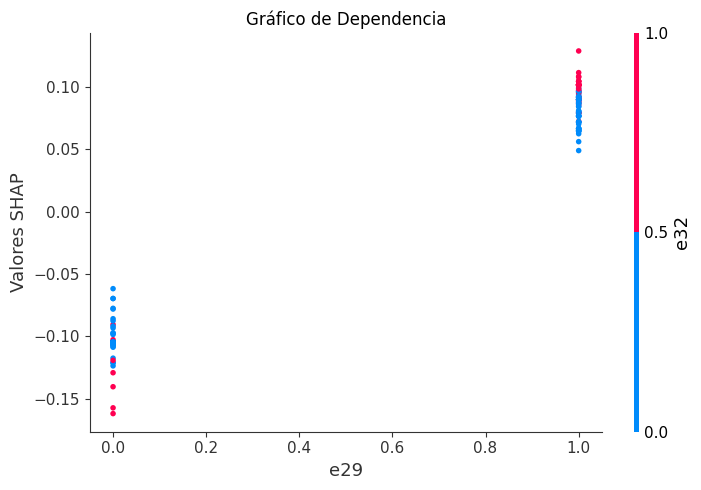

In [18]:
# Obtener el índice de la variable "e29" en tu DataFrame
indice = X.columns.get_loc("e29")

# Crear el gráfico de dependencia para "e29"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e29")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

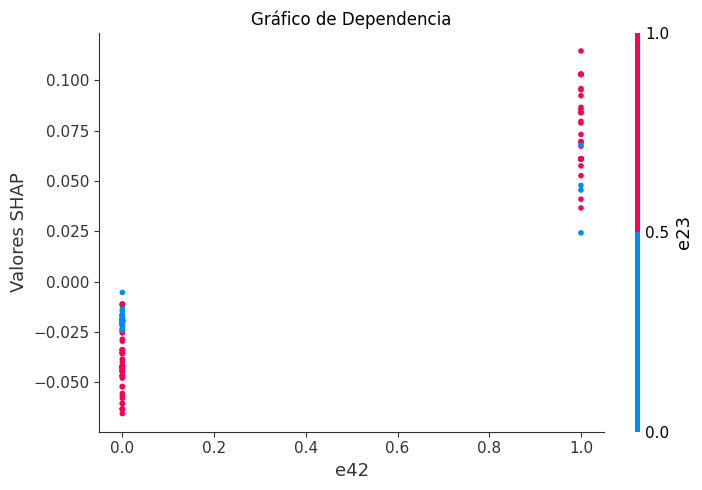

In [19]:
# Obtener el índice de la variable "e42" en tu DataFrame
indice = X.columns.get_loc("e42")

# Crear el gráfico de dependencia para "e42"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e42")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

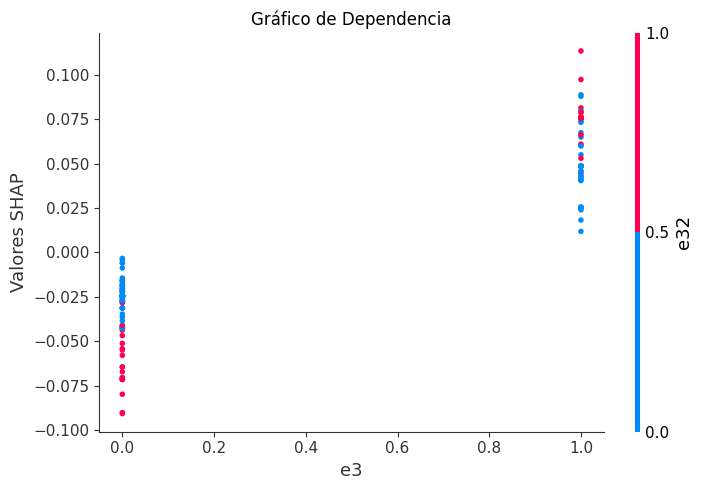

In [20]:
# Obtener el índice de la variable "e3" en tu DataFrame
indice = X.columns.get_loc("e3")

# Crear el gráfico de dependencia para "e3"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e3")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

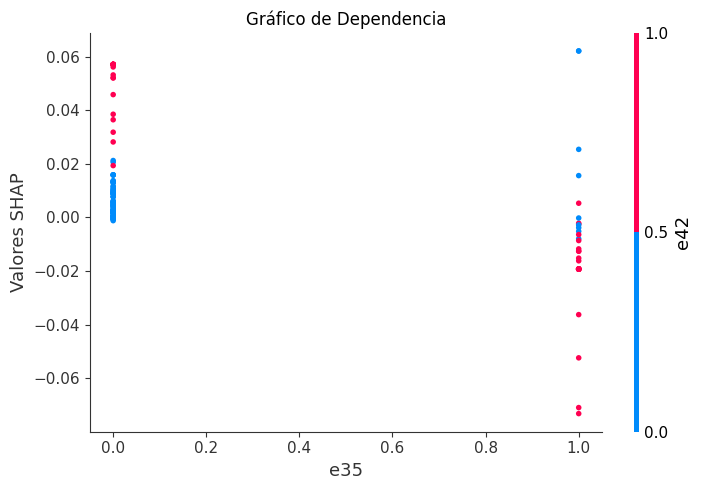

In [21]:
# Obtener el índice de la variable "e35" en tu DataFrame
indice = X.columns.get_loc("e35")

# Crear el gráfico de dependencia para "e35"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e35")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

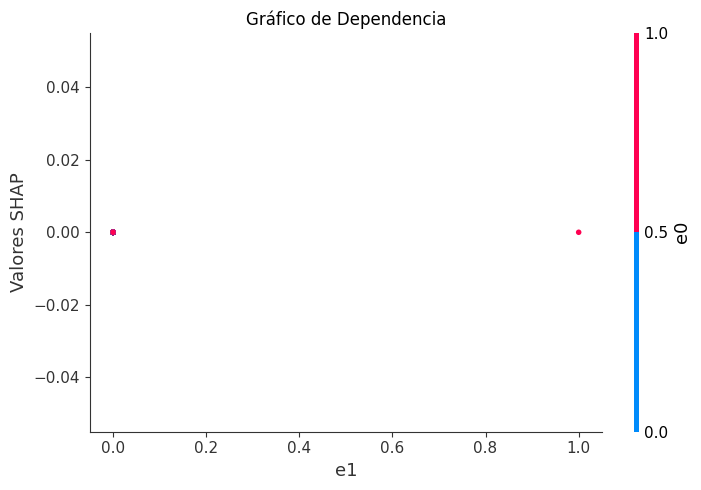

In [22]:
# Obtener el índice de la variable "e1" en tu DataFrame
indice = X.columns.get_loc("e1")

# Crear el gráfico de dependencia para "e1"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e1")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

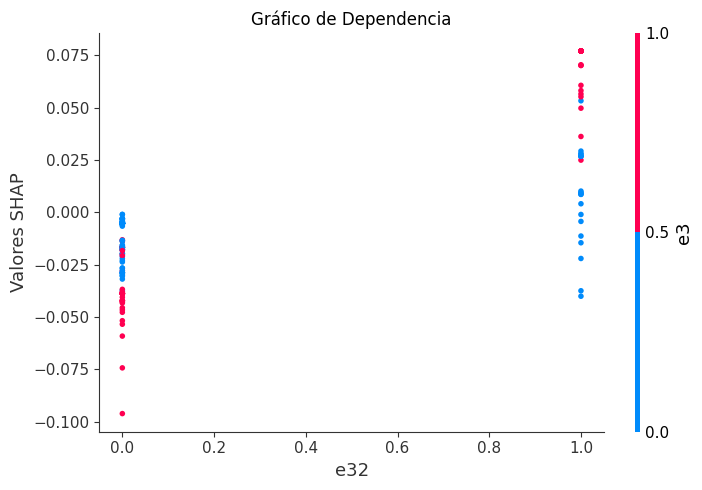

In [23]:
# Obtener el índice de la variable "e32" en tu DataFrame
indice = X.columns.get_loc("e32")

# Crear el gráfico de dependencia para "e32"
shap.dependence_plot(indice, shap_values, X_test, feature_names=X.columns, show=False)

# Personalizar la apariencia del gráfico
plt.xlabel("e32")
plt.ylabel("Valores SHAP")
plt.title("Gráfico de Dependencia")
plt.tight_layout()

# Mostrar el gráfico
plt.show()